In [1]:
%matplotlib inline
from modsim import *

In [2]:
from pandas import read_html

In [8]:
filename = 'http://www.u-s-history.com/pages/h980.html' 
tables = read_html (filename, 
                    header = 0, 
                    index_col = 0,
                    decimal = 'M')

In [9]:
table1a = tables[2]

In [10]:
table1a.columns = [ 'pop1ushis', 'increase', 'incp', 'urban', 'rural',]

table1a.head()

,pop1ushis,increase,incp,urban,rural
Census Year,,,,,
1790,3929214,-,-,5.1,94.9
1800,5308483,1379269,35.1,6.1,93.9
1810,7239881,1931398,36.4,15.4,92.7
1820,9638453,2398572,33.1,7.2,92.8
1830,12860702,3222249,33.4,8.8,91.2


In [11]:
table1a.tail()

,pop1ushis,increase,incp,urban,rural
Census Year,,,,,
1960,189323175,27997377,18.5,69.9,30.1
1970,213302031,23978856,13.4,73.6,26.3
1980,236542199,23240168,11.4,73.7,26.3
1990,258709873,22167674,9.8,75.2,24.8
2000,291421906,32712033,13.2,81.0,19.0


In [12]:
pop1ushis = table1a.pop1ushis

In [13]:
pop1ushis.values

array([  3929214,   5308483,   7239881,   9638453,  12860702,  17063353,
        23191876,  31443321,  38558371,  50189209,  62979766,  76212168,
        92228496, 106021537, 123202624, 142164569, 161325798, 189323175,
       213302031, 236542199, 258709873, 291421906], dtype=int64)

In [14]:
pop1ushis.index

Int64Index([1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890,
            1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000],
           dtype='int64', name='Census Year')

Saving figure to file chap03-fig01.pdf


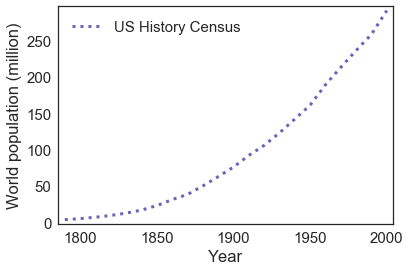

In [15]:
def plot_estimates(table):
    """Plot world population estimates.
    
    table: DataFrame with columns 'un' and 'census'
    """
    pop1ushis = table1a.pop1ushis / 1e6
   
    plot(pop1ushis, ':', color='darkblue', label='US History Census')
    
    decorate(xlabel='Year',
             ylabel='World population (million)')
    
newfig()
plot_estimates(table1a)
savefig('chap03-fig01.pdf')

In [16]:
filename = 'https://en.wikipedia.org/wiki/Demographic_history_of_the_United_States' 
tables = read_html (filename, 
                    header = 0, 
                    index_col = 0, 
                    decimal = 'M')

In [17]:
table1b = tables[3]

In [73]:
table1b.columns = ['pop2wiki']
table1b

,pop2wiki
Census year,
NaN,NaN
1610.0,350.0
1620.0,2302.0
1630.0,4646.0
1640.0,26634.0
1650.0,50368.0
1660.0,75058.0
1670.0,111935.0
1680.0,151507.0


In [19]:
pop2wiki = table1b.pop2wiki

In [20]:
def plot_estimates():
    pop1ushis = table1a.pop1ushis / 1e6
    pop2wiki = table1b.pop2wiki / 1e6
    
    plot(pop1ushis, ':', color='darkblue', label = 'US History')
    plot(pop2wiki, '--', color='green', label = 'Wikipedia')
    
    decorate(xlabel='Year',
             ylabel='US population (billion)')

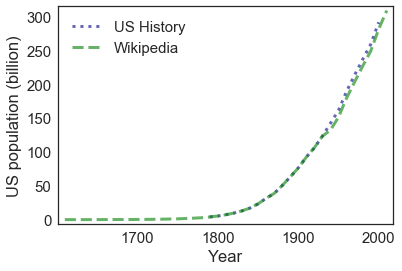

In [21]:
plot_estimates()

In [22]:
pop1ushis = table1a.pop1ushis / 1e6

In [23]:
pop2wiki = table1b.pop2wiki / 1e6

In [107]:
first_year1 = pop1ushis.index[0]
last_year1 = pop1ushis.index[-1]
first_year2 = pop2wiki.index[1]
last_year2 = pop2wiki.index[-1]

In [108]:
total_growth1 = pop1ushis[last_year1] - pop1ushis[first_year1]
elapsed_time1 = last_year1 - first_year1
annual_growth1 = total_growth1 / elapsed_time1

In [109]:
total_growth2 = pop2wiki[last_year2] - pop2wiki[first_year2]
elapsed_time2 = last_year2 - first_year2
annual_growth2 = total_growth2 / elapsed_time2

In [110]:
results1 = TimeSeries()
results1[1790] = pop1ushis[1790]

In [111]:
t01 = pop1ushis.index[0]
t_end1 = pop1ushis.index[-1]
total_growth1 = pop1ushis[t_end1] - pop1ushis[t01]
elapsed_time1 = t_end1 - t01
annual_growth1 = total_growth1 / elapsed_time1

In [112]:
system1 = System(t01=first_year1, 
                t_end1=last_year1, 
                p01=pop1ushis[first_year1],
                annual_growth1=annual_growth1)
p01=pop1ushis[first_year1]

In [113]:
for t in linrange(t01, t_end1):
    results1[t+1] = results1[t] + annual_growth1

In [114]:
results2 = TimeSeries()
results2[1610] = pop2wiki[1610]

In [139]:
t02 = pop2wiki.index[1]
t_end2 = pop2wiki.index[-1]
total_growth2 = pop2wiki[t_end2] - pop2wiki[t02]
elapsed_time2 = t_end2 - t02
annual_growth2 = total_growth2 / elapsed_time2

In [140]:
for t in linrange(t02, t_end2):
    results2[t+1] = results2[t] + annual_growth2

In [141]:
for t in linrange(t02, t_end2):
    results2[t+1] = results2[t] + annual_growth2

In [142]:
system2 = System(t02=first_year2, 
                t_end2=last_year2, 
                p02=pop2wiki[first_year2],
                annual_growth2=annual_growth2)

In [143]:
def run_simulation1(system1):
    results1=TimeSeries()
    results1[system1.t01] = system1.p01
    for t in linrange(system1.t01, system1.t_end1):
        results1[t+1] = results1[t] + system1.annual_growth1
    system1.results1 = results1

In [144]:
def plot_results1(system1):
    newfig()
    plot_estimates()
    plot(system1.results1, '--', color='gray', label='model')
    decorate(xlabel='Year',
            ylabel='US population (Million)',
            ylim=[0,350])

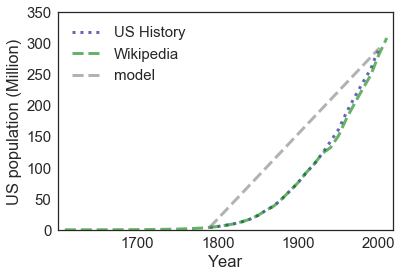

In [145]:
run_simulation1(system1)
plot_results1(system1)

In [122]:
def run_simulation2(system2):
    results2=TimeSeries()
    results2[system2.t02] = system2.p02
    for t in linrange(system2.t02, system2.t_end2):
        results2[t+1] = results2[t] + system2.annual_growth2
    system2.results2 = results2

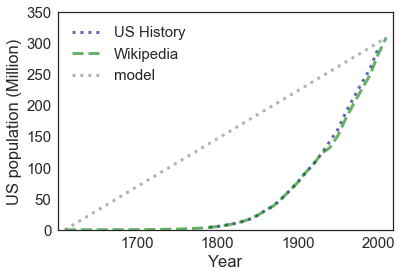

In [124]:
def plot_results2(system2):
    newfig()
    plot_estimates()
    plot(system2.results2, ':', color='gray', label='model')
    decorate(xlabel='Year',
            ylabel='US population (Million)',
            ylim=[0,350])
run_simulation2(system2)
plot_results2(system2)

END OF CONSTANT GROWTH MODEL

In [59]:
def run_simulation_our_estimation(system):
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths
    system.results = results

In [167]:
system = System(t01 = t01,
                t_end1 = t_end1,
                p01 = p01,
                pop1ushis = pop1ushis)

In [168]:
system.death_rate = 0.01
system.birth_rate = 0.027

In [169]:
def update_func1(pop, t, system):
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    return pop + births - deaths


In [170]:
def run_simulation(system, update_func):
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
    system.results = results

In [171]:
run_simulation(system,update_func1)

AttributeError: 'System' object has no attribute 'p0'

In [25]:
system.alpha = system.birth_rate - system.death_rate

In [26]:
def update_func1b(pop, t, system):
    net_growth = system.alpha * pop
    return pop + net_growth

In [27]:
run_simulation(system, update_func1b)

In [28]:
pop = wikipedia[t]

In [29]:
net_growth = system.alpha * pop

In [30]:
def update_func2(pop, t, system):
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

In [31]:
system.alpha = system.birth_rate - system.death_rate

In [32]:
system.alpha = 0.025
system.beta = -0.0018


In [33]:
net_growth = system.alpha * pop + system.beta * pop**2

In [34]:
run_simulation(system, update_func2)

In [35]:
pop_array = linspace(0.001, 15, 100)
net_growth_array = (system.alpha * pop_array + system.beta * pop_array**2)

In [36]:
def carrying_capacity(system):
    K = -system.alpha / system.beta
    return K
sys1 = System(alpha=0.025, beta=-0.0018)
pop = carrying_capacity(sys1)
print(pop)


13.8888888889


In [39]:
newfig()
run_simulation(system,update_func2)
plot_results(system)